In [10]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclaasification in every epoch.
    Underscored attributes are not being created upon the initialization of the object but by calling object's other methods.
    """
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta=eta
        self.n_iter=n_iter
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])      
        self.errors_ = []
                
        for i in range (self.n_iter):
            errors = 0
            self.update_1=[]
            a = self.w_
            np.savetxt('weight{}.csv'.format(i), np.column_stack(a), delimiter = ',', fmt='%s')
            for xi, target in zip(X,y):     # xi corresponds to features of ith row of X feature matrix and y is ith target.
                update = self.eta* (target - self.predict(xi))
                self.update_1.append(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            #print(errors)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:])+ self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [11]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.head())
df.tail()

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


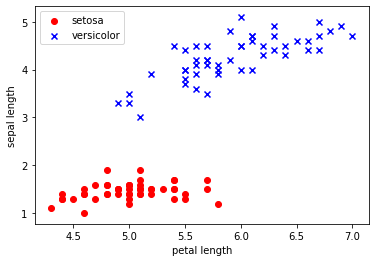

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o',label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

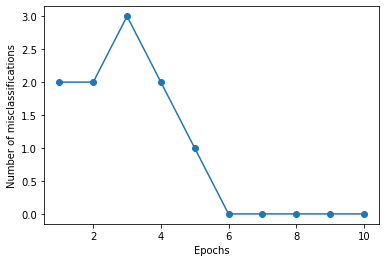

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_ , marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [24]:
import pandas as pd
weight=[pd.read_csv('weight{}.csv'.format(i), names = ['w0', 'w1', 'w2']) for i in range(10)]
weight1=pd.concat(weight)
weight1

,w0,w1,w2
0,0.0,0.00,0.00
0,0.0,0.38,0.66
0,0.0,0.76,1.32
0,-0.2,0.22,1.68
0,-0.2,0.34,2.10
0,-0.4,-0.68,1.82
0,-0.4,-0.68,1.82
0,-0.4,-0.68,1.82
0,-0.4,-0.68,1.82
0,-0.4,-0.68,1.82


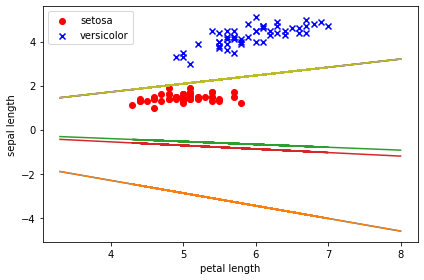

In [26]:
import matplotlib.pyplot as plt
import numpy as np
y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o',label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
for j in range(1,10):
    x1=np.array([min(X[:,0])-1]+list(X[:,0])+ [max(X[:,0])+1])
    x2= -(weight1.iloc[j,0]/weight1.iloc[j,2]) - ((weight1.iloc[j,1]/weight1.iloc[j,2])*x1)   
    plt.plot(x1, x2)
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


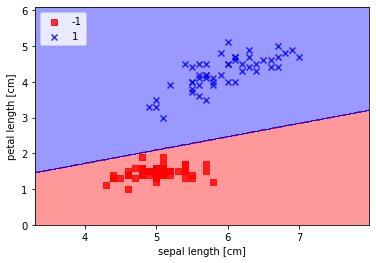

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange (x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)
        
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel ('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Plotly Interactive Visualization

In [44]:
import chart_studio
chart_studio.tools.set_credentials_file(username='amohanta', api_key='QhthrvCbgClZeofzdm3W')

In [45]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

X=df.iloc[0:100, [0,2]].values

trace0 = go.Scatter(x = X[:50, 0], y = X[:50,1], mode = 'markers', name = 'setosa')
trace1 = go.Scatter(x = X[50:100, 0], y = X[50:100,1], mode = 'markers', name = 'versicolor')

trace = []
for j in range(1,10):
    x1=np.array([min(X[:,0])-1]+list(X[:,0])+ [max(X[:,0])+1])
    x2= -(weight1.iloc[j,0]/weight1.iloc[j,2]) - ((weight1.iloc[j,1]/weight1.iloc[j,2])*x1)   
    trace2 = go.Scatter(x = x1, y = x2, mode = 'lines', name = 'Epoch{}'.format(j))
    trace.append(trace2)
layout= go.Layout(
    title= 'Perceptron_Iris Dataset',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Petal Length',
        ticklen= 5,
        zeroline= False,
        
    ),
    yaxis=dict(
        title= 'Sepal Length',
        ticklen= 5,
        
    ),
    showlegend= True
)
data = [trace0, trace1] + trace
fig= go.Figure(data=data, layout=layout)
py.iplot(fig)

## Plotly Dropdownmenu Visualization

In [47]:
import chart_studio.plotly as py
from plotly.graph_objs import *
import numpy as np

X=df.iloc[0:100, [0,2]].values

trace0 = go.Scatter(x = X[:50, 0], y = X[:50,1], mode = 'markers', name = 'setosa')
trace1 = go.Scatter(x = X[50:100, 0], y = X[50:100,1], mode = 'markers', name = 'versicolor')

trace = []
for j in range(1,7):
    x1=np.array([min(X[:,0])-1]+list(X[:,0])+ [max(X[:,0])+1])
    x2= -(weight1.iloc[j,0]/weight1.iloc[j,2]) - ((weight1.iloc[j,1]/weight1.iloc[j,2])*x1)   
    trace2 = go.Scatter(x = x1, y = x2, mode = 'lines', name = 'Epoch{}'.format(j))
    trace.append(trace2)

data = [trace0, trace1] + trace

layout = Layout(
    title='Perceptron_Iris Dataset',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True, True, True, True,True,True,True,True]],
                    label='All',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, True, True, False,False,False,False,False]],
                    label='Epoch1',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, True, False, True,False,False,False,False]],
                    label='Epoch2',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, True, False, False,True,False,False,False]],
                    label='Epoch3',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, True, False, False,False,True,False,False]],
                    label='Epoch4',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, True, False, False,False,False,True,False]],
                    label='Epoch5',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, True, False, False,False,False,False,True]],
                    label='Epoch6',
                    method='restyle'
                )
            ]),
        )
    ]),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig)

## Plotly Slider Visualization

In [52]:
import chart_studio.plotly as py
from plotly.graph_objs import *
import numpy as np

X=df.iloc[0:100, [0,2]].values

trace0 = go.Scatter(x = X[:50, 0], y = X[:50,1], mode = 'markers', name = 'setosa')
trace1 = go.Scatter(x = X[50:100, 0], y = X[50:100,1], mode = 'markers', name = 'versicolor')

trace = []
for j in range(1,7):
    x1=np.array([min(X[:,0])-1]+list(X[:,0])+ [max(X[:,0])+1])
    x2= -(weight1.iloc[j,0]/weight1.iloc[j,2]) - ((weight1.iloc[j,1]/weight1.iloc[j,2])*x1)   
    trace2 = go.Scatter(x = x1, y = x2, mode = 'lines', name = 'Epoch{}'.format(j))
    trace.append(trace2)

data = [trace0, trace1] + trace

steps = []
for i in range(len(trace)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [True, True] +[False] * len(trace)]
    )
    step['args'][1][i+2] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "n_iter: "},
    pad = {"t": 50},
    steps = steps  
    
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Perceptron Slider')

## Customizing the labels of the slide bar

In [51]:
import chart_studio.plotly as py
from plotly.graph_objs import *
import numpy as np

X=df.iloc[0:100, [0,2]].values

trace0 = go.Scatter(x = X[:50, 0], y = X[:50,1], mode = 'markers', name = 'setosa')
trace1 = go.Scatter(x = X[50:100, 0], y = X[50:100,1], mode = 'markers', name = 'versicolor')

trace = []
for j in range(1,7):
    x1=np.array([min(X[:,0])-1]+list(X[:,0])+ [max(X[:,0])+1])
    x2= -(weight1.iloc[j,0]/weight1.iloc[j,2]) - ((weight1.iloc[j,1]/weight1.iloc[j,2])*x1)   
    trace2 = go.Scatter(x = x1, y = x2, mode = 'lines', name = 'Epoch{}'.format(j))
    trace.append(trace2)

data = [trace0, trace1] + trace

steps = []
for i in range(len(trace)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [True, True] +[False] * len(trace)],
        label='Epoch{}'.format(i+1) # This is to set the label of the slidebar, Otherwise it will by default step 0..
    )
    step['args'][1][i+2] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "n_iter: "},
    pad = {"t": 50},
    steps = steps   
    
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Perceptron Slider')